In [1]:
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
from srayan_autoalign import *

In [2]:
%matplotlib inline

100%|██████████| 260/260 [00:01<00:00, 224.52it/s]


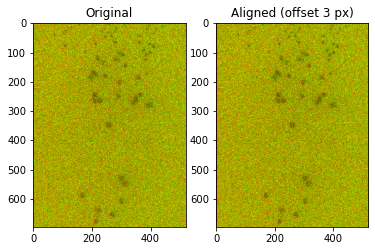

In [3]:
phantom = io.imread('../../data_store/2023-02-10 10pc 15um 3d phantom ff 400proj-resize.tif')
offsets, misalignments = plot_alignment_debug(phantom)

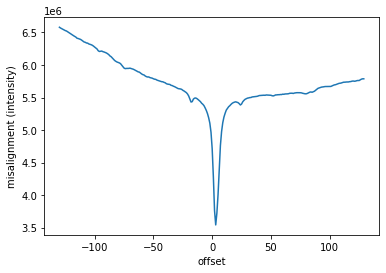

In [4]:
plt.xlabel('offset')
plt.ylabel('misalignment (intensity)')
plt.plot(offsets, misalignments)